# WeatherAPI

### Analysis
* Looking at the Temperature over various cities graph, we can see that temperatures rise as the latitude of the city approachs about 18 degrees. The first though is that peak temperatures should occur at the equater, but data shows otherwise. This possibly is due to the fact that the earth is tilted.
* Though humidity for most cities is above 60%, there may be a trend with its relationship with latitude. A "W" shape takes form with two troughs at about -20 and +25 degrees latitude. Possibly showin that at this time of year is the driest seasons for cities near those latitudes.  
* Cloudiness seems to have no observable trends nor a relationship with latitude. 
* Wind Speed tends to be around 15mph or less for the majority of the cities. No correlation with latitude.

In [1]:
# Importing Dependencies
import random
import numpy as np
import pandas as pd
from random import uniform
from citipy import citipy
import openweathermapy.core as owm
import matplotlib.pyplot as plt
import seaborn as sns

import datetime
now = datetime.datetime.now()

# Setting the OpenWeatherMap API key and the units for analysis
api_key = "f189580f4edf3f318d0c1ef6df1c1c13"
settings = {"units": "imperial", "APPID": api_key}

# Creating a set of random coordinates (x,y):(Latitude -90 to 90, Longitude -180 to 180)
# Picking 2000 variables to account for duplicates and search errors that may be found
# in the owm API
y = [round(uniform(-180,180),2) for x in np.arange(2000)]
x = [round(uniform(-90,90),2) for x in np.arange(2000)]

# Creating a dataframe from the randomly selected coordinatex
coord = pd.DataFrame({"Lat":x,"Lng":y})
coord.head()

,Lat,Lng
0,68.48,18.44
1,24.12,38.28
2,-67.37,-102.98
3,-87.44,168.90
4,29.31,-165.39


In [2]:
coord["Nearest City"] = ""
coord["Country Code"] = ""

# using citipy to find nearest city based on the Lat and Lng calculated above
for i,row in coord.iterrows():
    City = citipy.nearest_city(row["Lat"], row["Lng"])
    coord.loc[i,"Nearest City"] = City.city_name
    coord.loc[i,"Country Code"] = City.country_code

# dropping any duplicates to get unique list of cities, then resetting the index
coord = coord.drop_duplicates('Nearest City', keep='first').reset_index(drop=True)
print(coord.info())
coord.head()
               

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 706 entries, 0 to 705
Data columns (total 4 columns):
Lat             706 non-null float64
Lng             706 non-null float64
Nearest City    706 non-null object
Country Code    706 non-null object
dtypes: float64(2), object(2)
memory usage: 22.1+ KB
None


,Lat,Lng,Nearest City,Country Code
0,68.48,18.44,setermoen,no
1,24.12,38.28,umm lajj,sa
2,-67.37,-102.98,punta arenas,cl
3,-87.44,168.90,bluff,nz
4,29.31,-165.39,kapaa,us


In [3]:
# creating a list that will contain the complete set of cities and its information
# collected from API call
dictionary =[]

# for loop based on the dataframe above will call the owm API for each city
# some cities are not found, hence the try, except to skip the cities that dont
for i,row in coord.iterrows(): 
    
    try:
        test = owm.get_current(f"{row['Nearest City']}, {row['Country Code']}", **settings)
        dictionary.append(test)
        print(f"City #{i}, {row['Nearest City']}: Success")
    except:
        print(f"----City #{i},{row['Nearest City']} not found, Skipping")
        next
    

City #0, setermoen: Success
City #1, umm lajj: Success
City #2, punta arenas: Success
City #3, bluff: Success
City #4, kapaa: Success
----City #5,taolanaro not found, Skipping
City #6, asilah: Success
City #7, fortuna: Success
City #8, vaini: Success
City #9, yellowknife: Success
City #10, todos santos: Success
City #11, ixtapa: Success
City #12, ribeira grande: Success
City #13, bastrop: Success
City #14, longyearbyen: Success
City #15, jamestown: Success
City #16, pevek: Success
City #17, champerico: Success
City #18, rikitea: Success
City #19, chandur bazar: Success
----City #20,airai not found, Skipping
City #21, balkanabat: Success
City #22, acapulco: Success
----City #23,karaul not found, Skipping
City #24, thunder bay: Success
City #25, barsovo: Success
City #26, faanui: Success
City #27, axim: Success
City #28, saskylakh: Success
City #29, atuona: Success
City #30, albany: Success
City #31, saint-augustin: Success
City #32, ushuaia: Success
City #33, kaitangata: Success
City #3

City #271, nanortalik: Success
City #272, shieli: Success
City #273, samarai: Success
City #274, ostrovnoy: Success
City #275, vila velha: Success
City #276, namatanai: Success
----City #277,utiroa not found, Skipping
City #278, latung: Success
City #279, raton: Success
City #280, tual: Success
----City #281,svetlyy not found, Skipping
----City #282,ust-kamchatsk not found, Skipping
City #283, dire dawa: Success
City #284, hofn: Success
City #285, portland: Success
City #286, siavonga: Success
City #287, talara: Success
City #288, narsaq: Success
City #289, vangaindrano: Success
City #290, yichang: Success
City #291, mnogovershinnyy: Success
City #292, okhotsk: Success
----City #293,toliary not found, Skipping
City #294, puntarenas: Success
City #295, marabba: Success
City #296, tarakan: Success
City #297, port blair: Success
City #298, zaysan: Success
City #299, volcan: Success
----City #300,halalo not found, Skipping
City #301, impfondo: Success
City #302, ancud: Success
City #303, c

City #535, pandan: Success
City #536, willowmore: Success
City #537, kuybyshevskiy zaton: Success
City #538, marsa matruh: Success
City #539, namibe: Success
----City #540,mergui not found, Skipping
City #541, palora: Success
City #542, abu kamal: Success
City #543, awbari: Success
City #544, tabou: Success
----City #545,shchelyayur not found, Skipping
----City #546,japura not found, Skipping
City #547, zhigansk: Success
City #548, mengyin: Success
----City #549,sofiysk not found, Skipping
City #550, high level: Success
City #551, camacupa: Success
City #552, kodinsk: Success
----City #553,krasnoselkup not found, Skipping
City #554, iqaluit: Success
City #555, the valley: Success
City #556, anloga: Success
City #557, san andres: Success
----City #558,umzimvubu not found, Skipping
City #559, port macquarie: Success
City #560, howard springs: Success
City #561, tahe: Success
City #562, ormara: Success
City #563, bhadra: Success
City #564, pacifica: Success
----City #565,saleaula not foun

In [4]:
City=[]
Country=[]
Lat=[]
Temp=[]
Humidity=[]
Cloudiness=[]
Windspeed=[]

# From the dictionary created, making a dataframe of desired information
for x in dictionary:
    City.append(x["name"])
    Country.append(x["sys"]["country"])
    Lat.append(x["coord"]["lat"])
    Temp.append(x["main"]["temp"])
    Humidity.append(x["main"]["humidity"])
    Cloudiness.append(x["clouds"]["all"])
    Windspeed.append(x["wind"]["speed"])

completeDF = pd.DataFrame({"City":City,
                           "Country":Country,
                           "Latitude":Lat,
                           "Temperature":Temp,
                           "Humidity":Humidity,
                           "Cloudiness":Cloudiness,
                           "Windspeed":Windspeed,
                          })
completeDF=completeDF[["City","Country","Latitude", "Temperature","Humidity","Cloudiness","Windspeed"]]

completeDF.to_csv("Outputs/WeatherData.csv")
completeDF.info()
completeDF.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 7 columns):
City           615 non-null object
Country        615 non-null object
Latitude       615 non-null float64
Temperature    615 non-null float64
Humidity       615 non-null int64
Cloudiness     615 non-null int64
Windspeed      615 non-null float64
dtypes: float64(3), int64(2), object(2)
memory usage: 33.7+ KB


,City,Country,Latitude,Temperature,Humidity,Cloudiness,Windspeed
0,Setermoen,NO,68.86,48.20,93,75,4.70
1,Umm Lajj,SA,25.02,96.83,47,0,19.26
2,Punta Arenas,CL,-53.16,33.91,100,40,19.46
3,Bluff,NZ,-46.60,43.73,100,92,6.17
4,Kapaa,US,22.08,74.07,83,20,7.29


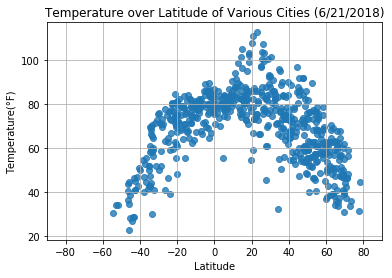

In [9]:
# Plotting using the complete dataframe, then saving the graphs as images 

sns.regplot(x=completeDF["Latitude"],y=completeDF["Temperature"],fit_reg=False)
plt.xlim(-90,90)
plt.ylabel("Temperature(°F)")
plt.title(f"Temperature over Latitude of Various Cities ({now.month}/{now.day}/{now.year})")
plt.grid()

plt.savefig("Outputs/Temperature.jpeg")

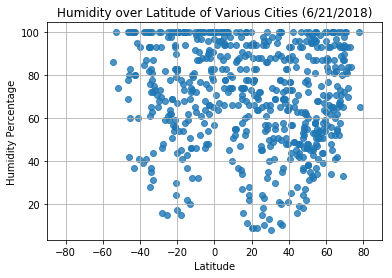

In [10]:
sns.regplot(x=completeDF["Latitude"],y=completeDF["Humidity"],fit_reg=False)
plt.xlim(-90,90)
plt.ylabel("Humidity Percentage")
plt.title(f"Humidity over Latitude of Various Cities ({now.month}/{now.day}/{now.year})")
plt.grid()

plt.savefig("Outputs/Humidity.jpeg")

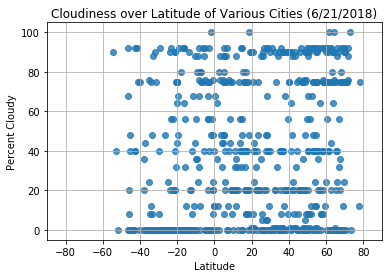

In [11]:
sns.regplot(x=completeDF["Latitude"],y=completeDF["Cloudiness"],fit_reg=False)
plt.xlim(-90,90)
plt.ylabel("Percent Cloudy")
plt.title(f"Cloudiness over Latitude of Various Cities ({now.month}/{now.day}/{now.year})")
plt.grid()

plt.savefig("Outputs/Cloudiness.jpeg")

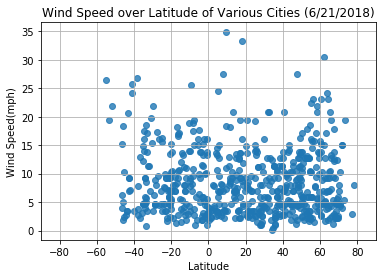

In [12]:
sns.regplot(x=completeDF["Latitude"],y=completeDF["Windspeed"],fit_reg=False)
plt.xlim(-90,90)
plt.ylabel("Wind Speed(mph)")
plt.title(f"Wind Speed over Latitude of Various Cities ({now.month}/{now.day}/{now.year})")
plt.grid()

plt.savefig("Outputs/Windspeed.jpeg")